# Step 1: Data analysis & Pre-processing

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 1. Importing NYPD arrest data from catalog.data.gov

In [98]:
original = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")
dats = original

### 2. Looking at the number of entries (63,621), number of features (19), and summary statistics

In [101]:
dats.head()

ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0   280255493   1/10/2024  397.0  ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
1   279805419    1/2/2024  157.0                          RAPE 1  104.0   
2   279895750    1/3/2024  101.0                       ASSAULT 3  344.0   
3   280809090   1/19/2024  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
4   280357135   1/11/2024  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   

                      OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                       ROBBERY  PL 1601001          F           M   
1                          RAPE  PL 1303501          F           K   
2  ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           Q   
3               DANGEROUS DRUGS  PL 2200300          M           B   
4                FELONY ASSAULT  PL 1200502          F           K   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX       PERP_RACE  \
0               26                  0       <18        M           BLACK   
1               77                  0     25-44        M  WHITE HISPANIC   
2              106                  0       65+        F           WHITE   
3               49                  0     45-64        M           BLACK   
4               81                  2     25-44        F           BLACK   

   X_COORD_CD  Y_COORD_CD   Latitude  Longitude  \
0      996342      236149  40.814845 -73.956312   
1     1003509      185018  40.674496 -73.930571   
2     1026836      180689  40.662526 -73.846499   
3     1027430      251104  40.855793 -73.843908   
4     1002457      192292  40.694456 -73.934343   

                     New Georeferenced Column  
0                POINT (-73.956312 40.814845)  
1  POINT (-73.9305713255961 40.6744956865259)  
2                POINT (-73.846499 40.662526)  
3                POINT (-73.843908 40.855793)  
4                POINT (-73.934343 40.694456)

In [103]:
dats.describe()

ARREST_KEY         PD_CD         KY_CD  ARREST_PRECINCT  \
count  6.362100e+04  63619.000000  63612.000000     63621.000000   
mean   2.822203e+08    440.414687    254.941002        63.337279   
std    1.387821e+06    274.537356    150.296448        35.192684   
min    2.797635e+08      2.000000    101.000000         1.000000   
25%    2.810329e+08    139.000000    113.000000        40.000000   
50%    2.822323e+08    419.000000    341.000000        63.000000   
75%    2.834321e+08    705.000000    344.000000       101.000000   
max    2.846252e+08    973.000000    995.000000       123.000000   

       JURISDICTION_CODE    X_COORD_CD     Y_COORD_CD      Latitude  \
count       63621.000000  6.362100e+04   63621.000000  63621.000000   
mean            0.946731  1.005320e+06  207682.477515     40.735404   
std             7.187989  2.219886e+04   29489.571873      0.242299   
min             0.000000  0.000000e+00       0.000000      0.000000   
25%             0.000000  9.905030e+05  185710.000000     40.676347   
50%             0.000000  1.005040e+06  206851.000000     40.734434   
75%             0.000000  1.017689e+06  235265.000000     40.812415   
max            97.000000  1.067185e+06  271282.000000     40.911236   

          Longitude  
count  63621.000000  
mean     -73.921505  
std        0.421644  
min      -74.252711  
25%      -73.977428  
50%      -73.924895  
75%      -73.879171  
max        0.000000

In [105]:
dats.count()

ARREST_KEY                  63621
ARREST_DATE                 63621
PD_CD                       63619
PD_DESC                     63621
KY_CD                       63612
OFNS_DESC                   63621
LAW_CODE                    63621
LAW_CAT_CD                  63219
ARREST_BORO                 63621
ARREST_PRECINCT             63621
JURISDICTION_CODE           63621
AGE_GROUP                   63621
PERP_SEX                    63621
PERP_RACE                   63621
X_COORD_CD                  63621
Y_COORD_CD                  63621
Latitude                    63621
Longitude                   63621
New Georeferenced Column    63621
dtype: int64

#### The "New Georeferenced Column" is redundant, and adds no new information. The very same location information is already present in the "Latitude" and "Longitude" features. Therefore, we will drop it.

In [108]:
dats = dats.drop("New Georeferenced Column", axis = 1)

#### Additionally, the "ARREST_KEY" is a randomly generated persistent ID for each arrest, and is therefore not related with any of the other features. Therefore, it will be removed.

In [111]:
dats = dats.drop("ARREST_KEY", axis = 1)

### 3. Handling missing values

In [114]:
dats.isnull().sum()

ARREST_DATE            0
PD_CD                  2
PD_DESC                0
KY_CD                  9
OFNS_DESC              0
LAW_CODE               0
LAW_CAT_CD           402
ARREST_BORO            0
ARREST_PRECINCT        0
JURISDICTION_CODE      0
AGE_GROUP              0
PERP_SEX               0
PERP_RACE              0
X_COORD_CD             0
Y_COORD_CD             0
Latitude               0
Longitude              0
dtype: int64

#### Because we have such a large dataset (63k entries), we will drop the roughly 400 entries with missing values.

In [117]:
dats = dats.dropna()

In [119]:
dats.isnull().sum()

ARREST_DATE          0
PD_CD                0
PD_DESC              0
KY_CD                0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
X_COORD_CD           0
Y_COORD_CD           0
Latitude             0
Longitude            0
dtype: int64

### 4. Checking for mismatched string formats

In [122]:
pd_desc = dats["PD_DESC"].value_counts()
print(pd_desc)

PD_DESC
ASSAULT 3                         6597
LARCENY,PETIT FROM OPEN AREAS,    6526
TRAFFIC,UNCLASSIFIED MISDEMEAN    3785
ASSAULT 2,1,UNCLASSIFIED          3593
ROBBERY,OPEN AREA UNCLASSIFIED    2934
                                  ... 
DRUG, INJECTION OF                   1
GAMBLING 2, PROMOTING, POLICY-       1
IMPROPER LIGHTS                      1
USE OF A CHILD IN A SEXUAL PER       1
FACILITATION 4, CRIMINAL             1
Name: count, Length: 213, dtype: int64


In [124]:
dats["OFNS_DESC"].value_counts()

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES            8960
PETIT LARCENY                           6526
FELONY ASSAULT                          5288
DANGEROUS DRUGS                         4733
MISCELLANEOUS PENAL LAW                 3992
VEHICLE AND TRAFFIC LAWS                3923
GRAND LARCENY                           3068
ROBBERY                                 2945
CRIMINAL MISCHIEF & RELATED OF          2817
DANGEROUS WEAPONS                       2509
OTHER OFFENSES RELATED TO THEF          2227
OFFENSES AGAINST PUBLIC ADMINI          1981
BURGLARY                                1599
OFFENSES INVOLVING FRAUD                1384
SEX CRIMES                              1383
FORGERY                                 1293
OFF. AGNST PUB ORD SENSBLTY &           1138
POSSESSION OF STOLEN PROPERTY           1064
CRIMINAL TRESPASS                        762
OTHER TRAFFIC INFRACTION                 707
INTOXICATED & IMPAIRED DRIVING           639
GRAND LARCENY OF MOTOR VEHICLE           562


In [126]:
dats["LAW_CODE"].value_counts()

LAW_CODE
PL 1552500    6526
PL 1200001    6454
VTL0511001    2464
PL 215510B    2162
PL 1651503    2112
              ... 
PL 14025BX       1
PL 1781502       1
PL 24030AH       1
PL 13052A1       1
PL 140252X       1
Name: count, Length: 758, dtype: int64

In [128]:
dats["LAW_CAT_CD"].value_counts()

LAW_CAT_CD
M    35576
F    26650
V      775
9      155
I       54
Name: count, dtype: int64

In [130]:
dats["ARREST_BORO"].value_counts()

ARREST_BORO
K    17333
M    15150
B    14123
Q    13727
S     2877
Name: count, dtype: int64

In [132]:
dats["AGE_GROUP"].value_counts()

AGE_GROUP
25-44    36973
45-64    12245
18-24    10631
<18       2325
65+       1036
Name: count, dtype: int64

In [134]:
dats["PERP_SEX"].value_counts()

PERP_SEX
M    52068
F    11142
Name: count, dtype: int64

In [136]:
dats["PERP_RACE"].value_counts()

PERP_RACE
BLACK                             29318
WHITE HISPANIC                    17075
WHITE                              6564
BLACK HISPANIC                     6274
ASIAN / PACIFIC ISLANDER           3506
UNKNOWN                             289
AMERICAN INDIAN/ALASKAN NATIVE      184
Name: count, dtype: int64

#### There do not appear to be any mismatched strings. However, this is difficult to tell for the PD_DESC and LAW_CODE columns because they have so many unique values.

### 5. Handling Outliers

In [140]:
dats.describe()

PD_CD         KY_CD  ARREST_PRECINCT  JURISDICTION_CODE  \
count  63210.000000  63210.000000     63210.000000       63210.000000   
mean     442.903560    250.234409        63.443063           0.943395   
std      273.572862    138.662618        35.142007           7.153532   
min      101.000000    101.000000         1.000000           0.000000   
25%      175.000000    113.000000        40.000000           0.000000   
50%      419.000000    340.000000        63.000000           0.000000   
75%      705.000000    344.000000       101.000000           0.000000   
max      973.000000    881.000000       123.000000          97.000000   

         X_COORD_CD     Y_COORD_CD      Latitude     Longitude  
count  6.321000e+04   63210.000000  63210.000000  63210.000000  
mean   1.005365e+06  207657.938159     40.735328    -73.921325  
std    2.220262e+04   29508.649470      0.243015      0.422965  
min    0.000000e+00       0.000000      0.000000    -74.252711  
25%    9.905130e+05  185643.000000     40.676171    -73.977392  
50%    1.005040e+06  206851.000000     40.734434    -73.924895  
75%    1.017775e+06  235262.000000     40.812385    -73.878963  
max    1.067185e+06  271282.000000     40.911236      0.000000

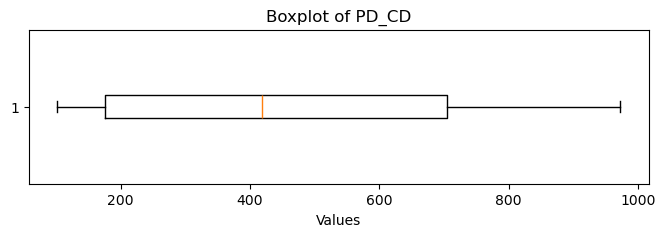

In [142]:
plt.figure(figsize=(8, 2))
plt.boxplot(dats['PD_CD'], vert=False)
plt.title('Boxplot of PD_CD')
plt.xlabel('Values')
plt.show()

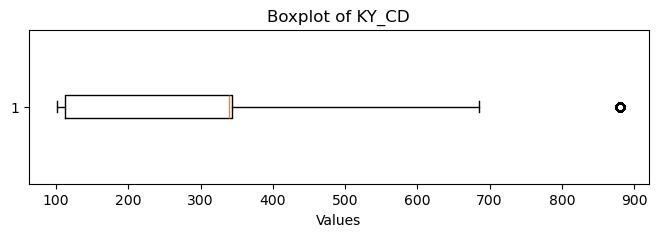

In [144]:
plt.figure(figsize=(8, 2))
plt.boxplot(dats['KY_CD'], vert=False)
plt.title('Boxplot of KY_CD')
plt.xlabel('Values')
plt.show()

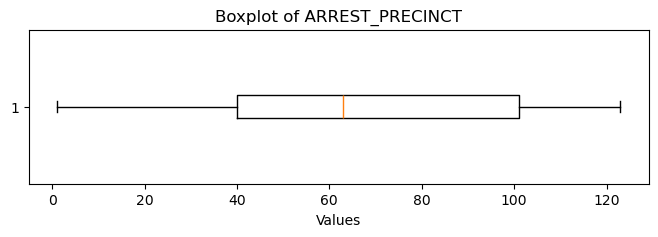

In [146]:
plt.figure(figsize=(8, 2))
plt.boxplot(dats['ARREST_PRECINCT'], vert=False)
plt.title('Boxplot of ARREST_PRECINCT')
plt.xlabel('Values')
plt.show()

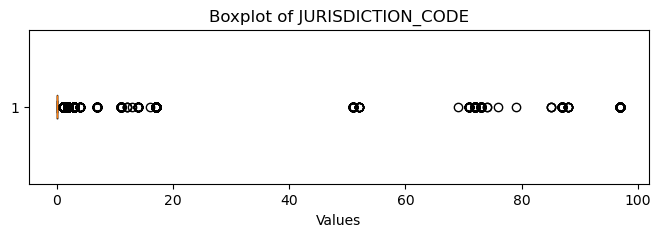

In [148]:
plt.figure(figsize=(8, 2))
plt.boxplot(dats['JURISDICTION_CODE'], vert=False)
plt.title('Boxplot of JURISDICTION_CODE')
plt.xlabel('Values')
plt.show()

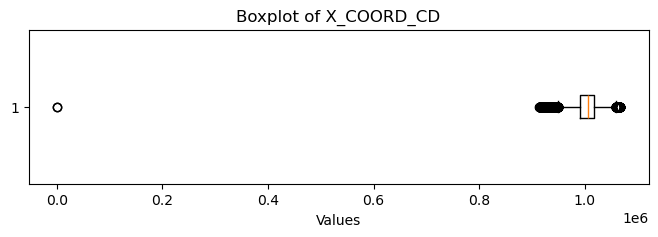

In [150]:
plt.figure(figsize=(8, 2))
plt.boxplot(dats['X_COORD_CD'], vert=False)
plt.title('Boxplot of X_COORD_CD')
plt.xlabel('Values')
plt.show()

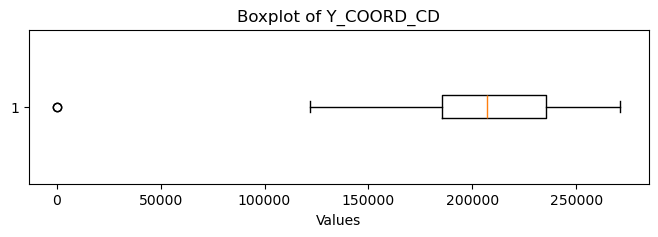

In [152]:
plt.figure(figsize=(8, 2))
plt.boxplot(dats['Y_COORD_CD'], vert=False)
plt.title('Boxplot of Y_COORD_CD')
plt.xlabel('Values')
plt.show()

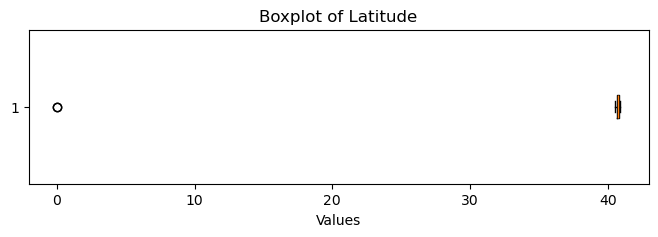

In [154]:
plt.figure(figsize=(8, 2))
plt.boxplot(dats['Latitude'], vert=False)
plt.title('Boxplot of Latitude')
plt.xlabel('Values')
plt.show()

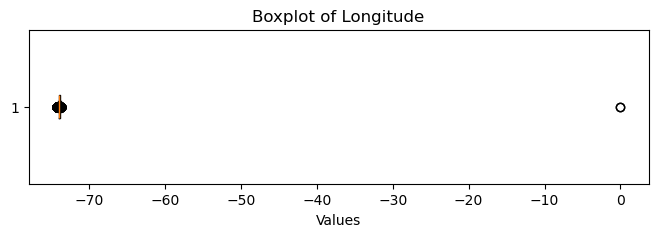

In [156]:
plt.figure(figsize=(8, 2))
plt.boxplot(dats['Longitude'], vert=False)
plt.title('Boxplot of Longitude')
plt.xlabel('Values')
plt.show()

#### For our non-categorical variables, it appears that KY_CD, JURISDICTION_CODE, X_COORD_CD, Y_COORD_CD, Latitude, and Longitude all have some outliers

In [159]:
def detect_outliers(df, column_name, threshold = 5):
    mean = df[column_name].mean()
    std = df[column_name].std()
    
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    
    for val in df[column_name]:
        if val <= lower_bound or val >= upper_bound:
            print(val)
            ind = df.index[df[column_name] == val].tolist()
            print(ind)

In [161]:
detect_outliers(dats, "KY_CD")

In [163]:
detect_outliers(dats, "JURISDICTION_CODE")

97
[162, 1187, 1211, 1492, 1890, 2030, 2289, 2671, 2967, 3447, 4596, 4843, 5602, 5901, 6674, 7453, 7715, 8069, 8078, 8873, 9380, 9420, 9896, 9995, 10125, 11501, 11681, 11797, 14683, 16224, 21485, 21610, 21800, 22022, 22144, 22698, 23262, 24082, 24241, 24394, 24709, 24774, 25040, 25058, 25346, 25562, 25662, 28760, 28950, 30147, 30284, 30689, 31225, 32527, 32532, 32590, 32818, 33614, 33904, 34166, 35309, 35570, 36019, 36034, 36240, 36882, 36953, 37444, 38033, 38845, 38882, 38902, 39084, 39867, 40322, 40685, 41815, 42459, 42779, 43006, 43052, 43249, 43299, 43658, 44269, 45012, 46170, 46771, 47019, 47443, 47980, 48014, 48153, 49672, 49853, 50165, 50539, 51408, 52006, 52442, 52676, 53162, 54240, 55435, 55595, 56462, 57040, 57623, 58122, 58621, 59618, 59883, 60107, 60782, 60810, 61116, 62287, 62773]
73
[238, 1898, 2163, 2381, 3241, 3258, 4104, 4927, 5282, 6310, 7265, 9894, 10216, 10608, 10972, 11460, 13044, 14261, 14698, 16076, 18126, 19119, 19916, 23323, 23894, 24032, 24604, 27231, 29585, 3

In [165]:
detect_outliers(dats, "X_COORD_CD")

0
[40573, 41238]
0
[40573, 41238]


In [167]:
detect_outliers(dats, "Y_COORD_CD")

0
[40573, 41238]
0
[40573, 41238]


In [169]:
detect_outliers(dats, "Latitude")

0.0
[40573, 41238]
0.0
[40573, 41238]


In [171]:
detect_outliers(dats, "Longitude")

0.0
[40573, 41238]
0.0
[40573, 41238]


#### The goal here is to catch the extreme outliers. Therefore, we will only be looking at values that are greater or lower than 5 standard deviations away from the mean. Unfortunately, the JURISDICTION_CODE feature ranges wildly. It really contains categorical data, as each jurisdiction is assigned a number. Therefore, we will not include it in this outlier detection analysis. However, we do notice that two rows are outliers when looking at the X_COORD, Y_COORD, Latitude, and Longitude features. It appears someone has inputted these features with values of 0 in these rows. We will now remove these rows from the dataset.

In [174]:
dats = dats.drop([40573, 41238])

### 8. Convert features with string datatype to categorical

In [177]:
dats['LAW_CAT_CD'] = pd.factorize(dats['LAW_CAT_CD'])[0]
dats['ARREST_BORO'] = pd.factorize(dats['ARREST_BORO'])[0]
dats['AGE_GROUP'] = pd.factorize(dats['AGE_GROUP'])[0]
dats['PERP_SEX'] = pd.factorize(dats['PERP_SEX'])[0]
dats['PERP_RACE'] = pd.factorize(dats['PERP_RACE'])[0]

In [179]:
dats['PD_DESC'] = pd.factorize(dats['PD_DESC'])[0]
dats['OFNS_DESC'] = pd.factorize(dats['OFNS_DESC'])[0]
dats['LAW_CODE'] = pd.factorize(dats['LAW_CODE'])[0]

#### Transforming the ARREST_DATE feature into month and day features. We won't include the year as everything is in 2024.

In [182]:
dats["ARREST_DATE_MONTH"] = pd.DatetimeIndex(dats["ARREST_DATE"]).month
dats["ARREST_DATE_DAY"] = pd.DatetimeIndex(dats["ARREST_DATE"]).day
dats = dats.drop("ARREST_DATE", axis = 1)

In [186]:
dats.describe()

PD_CD       PD_DESC         KY_CD     OFNS_DESC      LAW_CODE  \
count  63208.000000  63208.000000  63208.000000  63208.000000  63208.000000   
mean     442.901389     24.655202    250.231379     10.728547     59.095194   
std      273.567172     23.440508    138.663765      8.438409     86.726590   
min      101.000000      0.000000    101.000000      0.000000      0.000000   
25%      175.000000      7.000000    113.000000      3.000000     19.000000   
50%      419.000000     18.000000    340.000000     10.000000     34.000000   
75%      705.000000     35.000000    344.000000     16.000000     69.000000   
max      973.000000    212.000000    881.000000     59.000000    757.000000   

         LAW_CAT_CD   ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE  \
count  63208.000000  63208.000000     63208.000000       63208.000000   
mean       0.598105      1.560942        63.444659           0.943377   
std        0.538393      1.202326        35.141352           7.153640   
min        0.000000      0.000000         1.000000           0.000000   
25%        0.000000      1.000000        40.000000           0.000000   
50%        1.000000      1.000000        63.000000           0.000000   
75%        1.000000      3.000000       101.250000           0.000000   
max        4.000000      4.000000       123.000000          97.000000   

          AGE_GROUP      PERP_SEX     PERP_RACE    X_COORD_CD     Y_COORD_CD  \
count  63208.000000  63208.000000  63208.000000  6.320800e+04   63208.000000   
mean       1.871551      0.176259      1.176259  1.005397e+06  207664.508781   
std        1.257780      0.381044      1.568631  2.147064e+04   29485.987174   
min        0.000000      0.000000      0.000000  9.139790e+05  121929.000000   
25%        1.000000      0.000000      0.000000  9.905130e+05  185643.750000   
50%        1.000000      0.000000      1.000000  1.005040e+06  206851.000000   
75%        3.000000      0.000000      2.000000  1.017775e+06  235262.750000   
max        4.000000      1.000000      6.000000  1.067185e+06  271282.000000   

           Latitude     Longitude  ARREST_DATE_MONTH  ARREST_DATE_DAY  
count  63208.000000  63208.000000       63208.000000     63208.000000  
mean      40.736617    -73.923664           1.999478        15.471396  
std        0.080936      0.077433           0.821490         8.682859  
min       40.501092    -74.252711           1.000000         1.000000  
25%       40.676173    -73.977392           1.000000         8.000000  
50%       40.734434    -73.924895           2.000000        15.000000  
75%       40.812393    -73.878963           3.000000        23.000000  
max       40.911236    -73.700717           3.000000        31.000000

### 6. Data Visualization

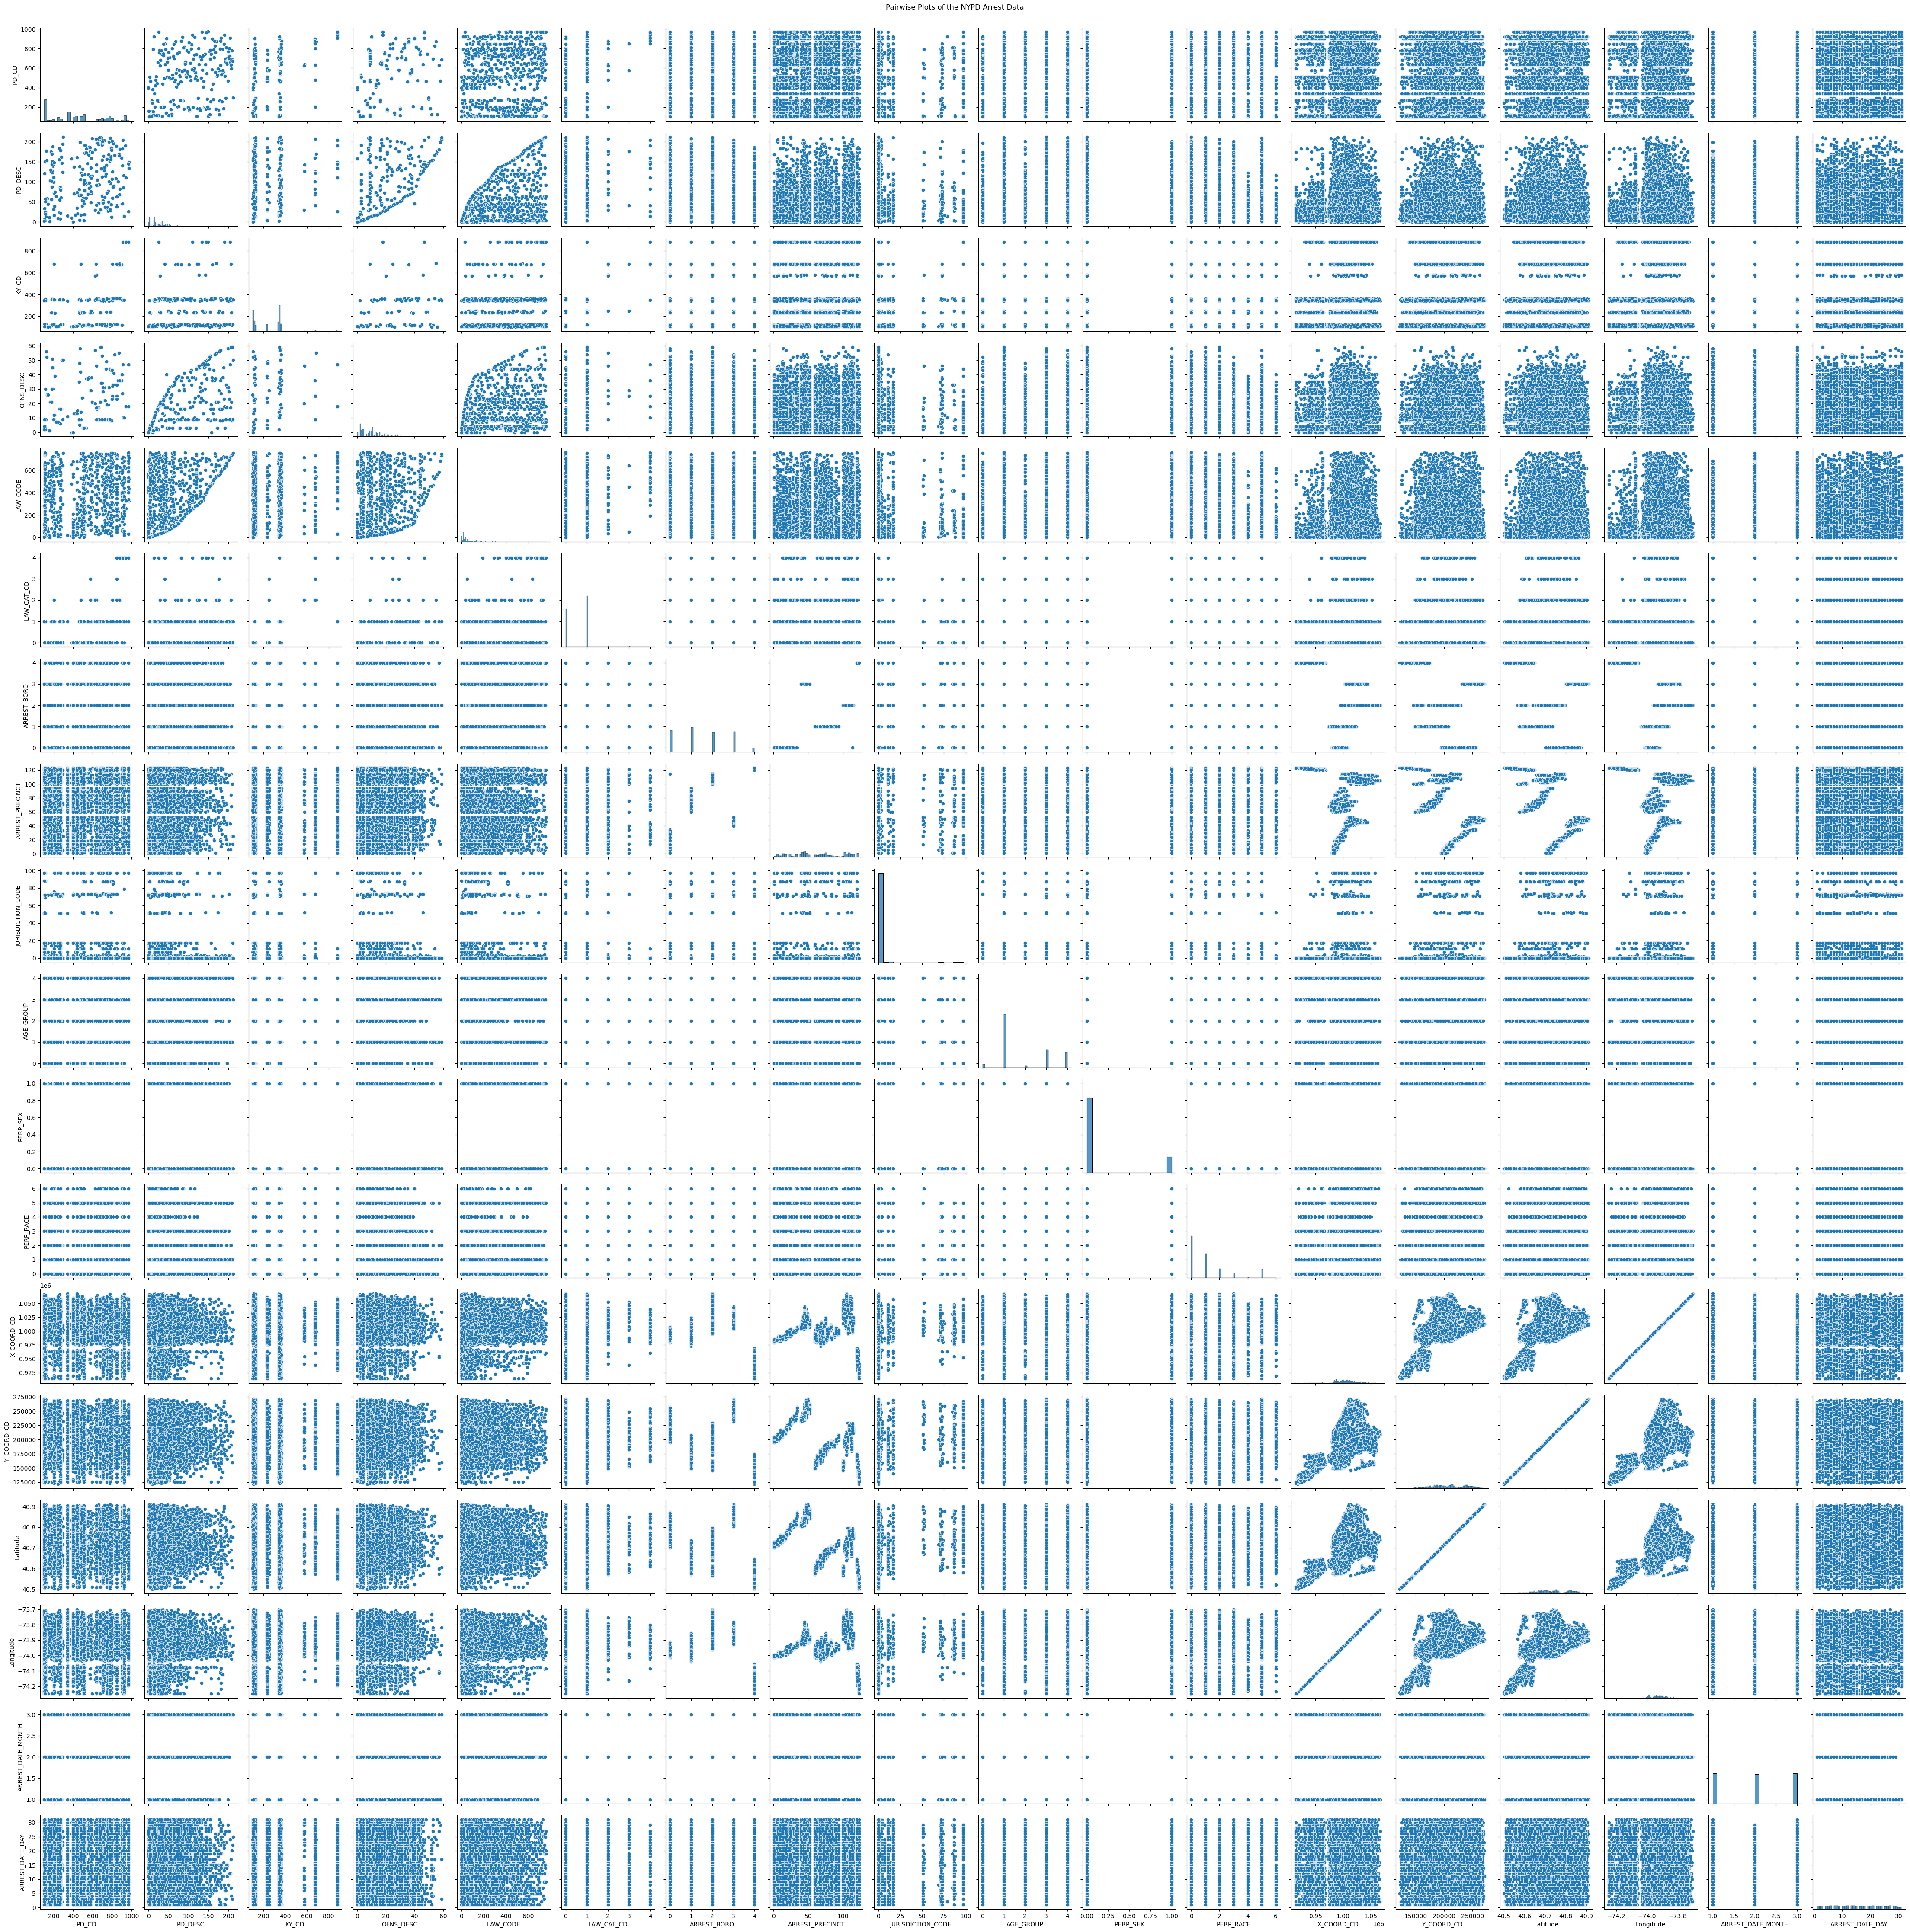

In [189]:
sns.pairplot(dats)
plt.suptitle('Pairwise Plots of the NYPD Arrest Data', y = 1)
plt.show()

<Axes: xlabel='Month'>

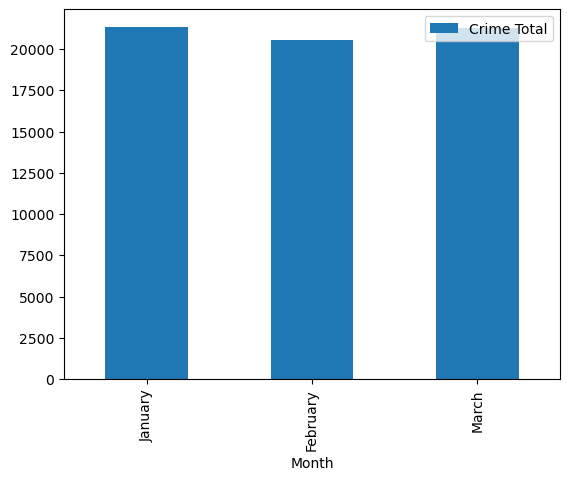

In [191]:
crime_counts_monthly = dats["ARREST_DATE_MONTH"].value_counts()
monthly_crime = pd.DataFrame()
monthly_crime["Month"] = ['January', 'February', 'March']
monthly_crime['Crime Total'] = [crime_counts_monthly[1], crime_counts_monthly[2], crime_counts_monthly[3]]
monthly_crime.plot.bar(x = 'Month', y = 'Crime Total')

<Axes: xlabel='Boroughs'>

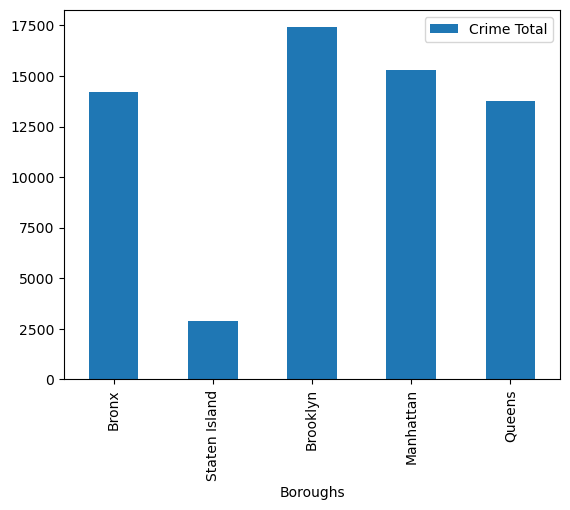

In [195]:
crime_counts_boro = original["ARREST_BORO"].value_counts()
boro_crime = pd.DataFrame()
boro_crime["Boroughs"] = ["Bronx", "Staten Island", "Brooklyn", "Manhattan", "Queens"]
boro_crime["Crime Total"] = [crime_counts_boro['B'], crime_counts_boro['S'], crime_counts_boro['K'], crime_counts_boro['M'], crime_counts_boro['Q']]
boro_crime.plot.bar(x = 'Boroughs', y = 'Crime Total')

<Axes: xlabel='Law Categories'>

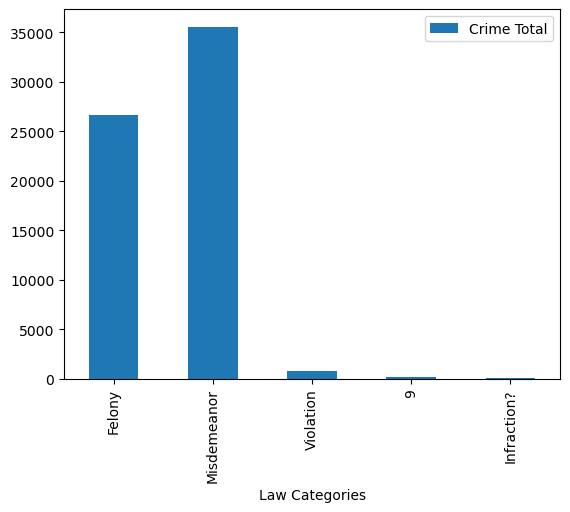

In [197]:
crime_counts = original["LAW_CAT_CD"].value_counts()
categorized_crime = pd.DataFrame()
categorized_crime["Law Categories"] = ["Felony", "Misdemeanor", "Violation", "9", "Infraction?"]
categorized_crime["Crime Total"] = [crime_counts['F'], crime_counts['M'], crime_counts['V'], crime_counts['9'], crime_counts['I']]
categorized_crime.plot.bar(x = 'Law Categories', y = 'Crime Total')

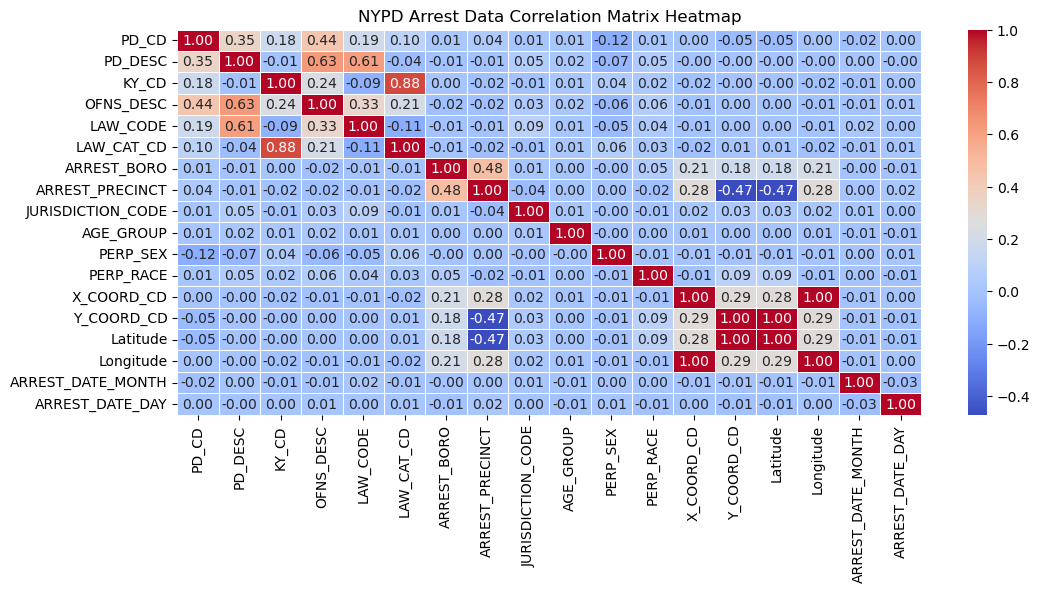

In [199]:
correl = dats.corr()
plt.figure(figsize=(12,5))
sns.heatmap(correl, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('NYPD Arrest Data Correlation Matrix Heatmap')
plt.show()

### 7. Correlation

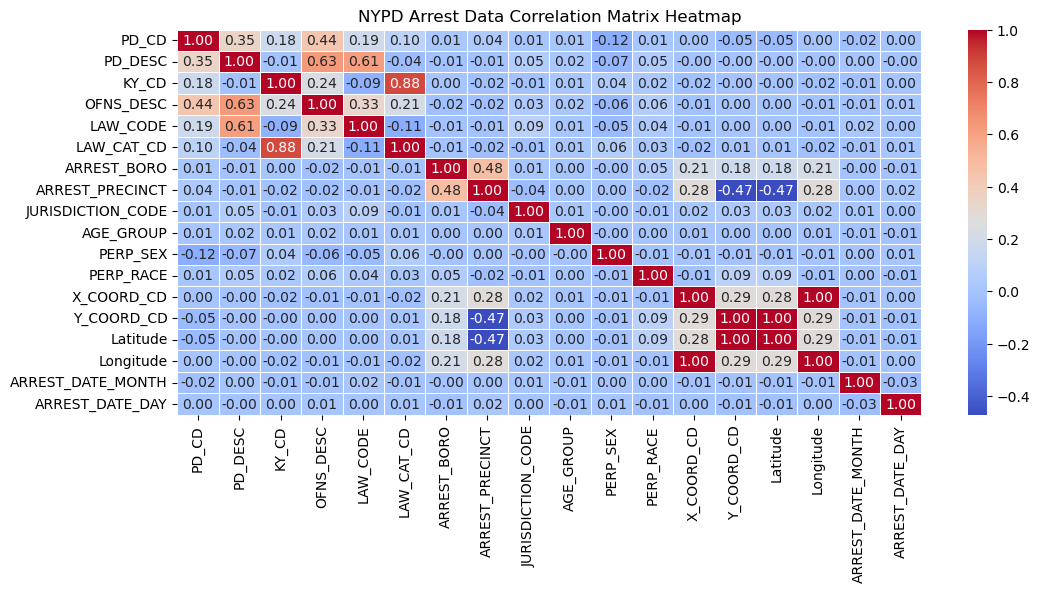

In [202]:
correl = dats.corr()
plt.figure(figsize=(12,5))
sns.heatmap(correl, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('NYPD Arrest Data Correlation Matrix Heatmap')
plt.show()

In [204]:
drop_columns = ["PD_DESC", "ARREST_BORO", "ARREST_PRECINCT", "JURISDICTION_CODE", "AGE_GROUP",
                "PERP_RACE", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "ARREST_DATE_MONTH",
                "ARREST_DATE_DAY"]

dats = dats.drop(columns = drop_columns)

#### Additionally removing "PD_DESC", "ARREST_BORO", "ARREST_PRECINCT", "JURISDICTION_CODE", "AGE_GROUP", "PERP_RACE", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "ARREST_DATE_MONTH", and "ARREST_DATE_DAY" as they have correlation values below 0.05 as compared with the target variable, LAW_CAT_CD.

### 9. Normalizing non-categorical features

In [208]:
scaler = StandardScaler()
col_to_scale = ["PD_CD", "KY_CD"]
dats[col_to_scale] = scaler.fit_transform(dats[col_to_scale])

In [210]:
dats

PD_CD     KY_CD  OFNS_DESC  LAW_CODE  LAW_CAT_CD  PERP_SEX
0     -0.167790 -1.047372          0         0           0         0
1     -1.045095 -1.054584          1         1           0         0
2     -1.249799  0.676236          2         2           1         1
3      0.248930 -0.109845          3         3           1         0
4     -1.220556 -1.040160          4         4           0         1
...         ...       ...        ...       ...         ...       ...
63616 -0.379805  0.654600         11        19           1         0
63617  0.248930 -0.109845          3         3           1         0
63618 -0.167790 -1.047372          0        46           0         0
63619  1.751315  0.705083         10        18           1         1
63620 -0.876945  0.733929         12        20           1         0

[63208 rows x 6 columns]

### 10. Choosing the target variable and features

#### Target Variable: LAW_CAT_CD

#### Features: PD_CD, KY_CD, OFNS_DESC, LAW_CODE, PERP_SEX

In [215]:
target = ["LAW_CAT_CD"]
features = ["PD_CD", "KY_CD", "OFNS_DESC", "LAW_CODE", "PERP_SEX"]

### 11. Train, Validation, Test Split

In [218]:
train, temp = train_test_split(dats, test_size = 0.3, random_state = 5)

In [220]:
test, val = train_test_split(temp, test_size = 0.5, random_state = 5)

In [222]:
x_train = train.drop(columns = ["LAW_CAT_CD"])
y_train = train["LAW_CAT_CD"]
#y_train = pd.DataFrame(train["LAW_CAT_CD"])

In [224]:
x_val = val.drop(columns = ["LAW_CAT_CD"])
y_val = val["LAW_CAT_CD"]
#y_val = pd.DataFrame(val["LAW_CAT_CD"])

In [226]:
x_test = test.drop(columns = ["LAW_CAT_CD"])
y_test = test["LAW_CAT_CD"]
#y_test = pd.DataFrame(test["LAW_CAT_CD"])

### 12. Printing the Shapes of our data

In [229]:
print("Training Data: x followed by y")
print(x_train.shape)
print(y_train.shape)

Training Data: x followed by y
(44245, 5)
(44245,)


In [231]:
print("Validation Data: x followed by y")
print(x_val.shape)
print(y_val.shape)

Validation Data: x followed by y
(9482, 5)
(9482,)


In [233]:
print("Testing Data: x followed by y")
print(x_test.shape)
print(y_test.shape)

Testing Data: x followed by y
(9481, 5)
(9481,)


# Step 2: ML Models

### 1. Applying KNN - This is based on the CSE 574 Machine Learning Project 3 submission by myself, Johann Matzal

In [58]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(3,15,2):

    # Creating the KNN clusters
    knn_model = KNeighborsClassifier(n_neighbors = k)

    # Training the KNN model
    knn_model.fit(x_train, y_train)

    # Predicting test_y
    knn_pred = knn_model.predict(x_val)
    #print(knn_pred)

    # Calculating the overall accuracy of the model: total number of correct predictions / total number of observations
    accuracy_knn = knn_model.score(x_val, y_val)
    print(f'Test Accuracy: {accuracy_knn*100:.5f}%')
    print(k)

Test Accuracy: 99.64143%
3
Test Accuracy: 99.53596%
5
Test Accuracy: 99.41995%
7
Test Accuracy: 99.35668%
9
Test Accuracy: 99.25121%
11
Test Accuracy: 99.10356%
13


#### The Validation dataset indicates that the best value for k is 3. Therefore, we will now use the test data with a k value of 3

In [120]:
# Creating the KNN clusters
knn_model = KNeighborsClassifier(n_neighbors = 3)

# Training the KNN model
knn_model.fit(x_train, y_train)

# Predicting test_y
knn_pred = knn_model.predict(x_test)
#print(knn_pred)

# Calculating the overall accuracy of the model: total number of correct predictions / total number of observations
accuracy_knn = knn_model.score(x_test, y_test)
print(f'Test Accuracy: {accuracy_knn*100:.5f}%')

Test Accuracy: 99.54646%


In [116]:
from sklearn.metrics import hamming_loss
knn_loss = hamming_loss(y_test, knn_pred)
print(knn_loss)

0.004535386562598882


In [60]:
from sklearn.metrics import classification_report
knn_report = classification_report(y_test, knn_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3932
           1       1.00      1.00      1.00      5414
           2       0.98      0.99      0.99       110
           3       0.95      1.00      0.97        19
           4       0.60      0.50      0.55         6

    accuracy                           1.00      9481
   macro avg       0.90      0.90      0.90      9481
weighted avg       1.00      1.00      1.00      9481



##### Precision: the total number of correct predictions for the number divided by the total number of predictions for that number
##### Recall: the total number of correct predictions for the number divided by its total number of occurences
##### f1-score: the average of precision and recall: (precision + recall)/2
##### Support: Total number of samples for each number

Text(0.5, 1.0, 'K-Nearest Neighbor Confusion Matrix')

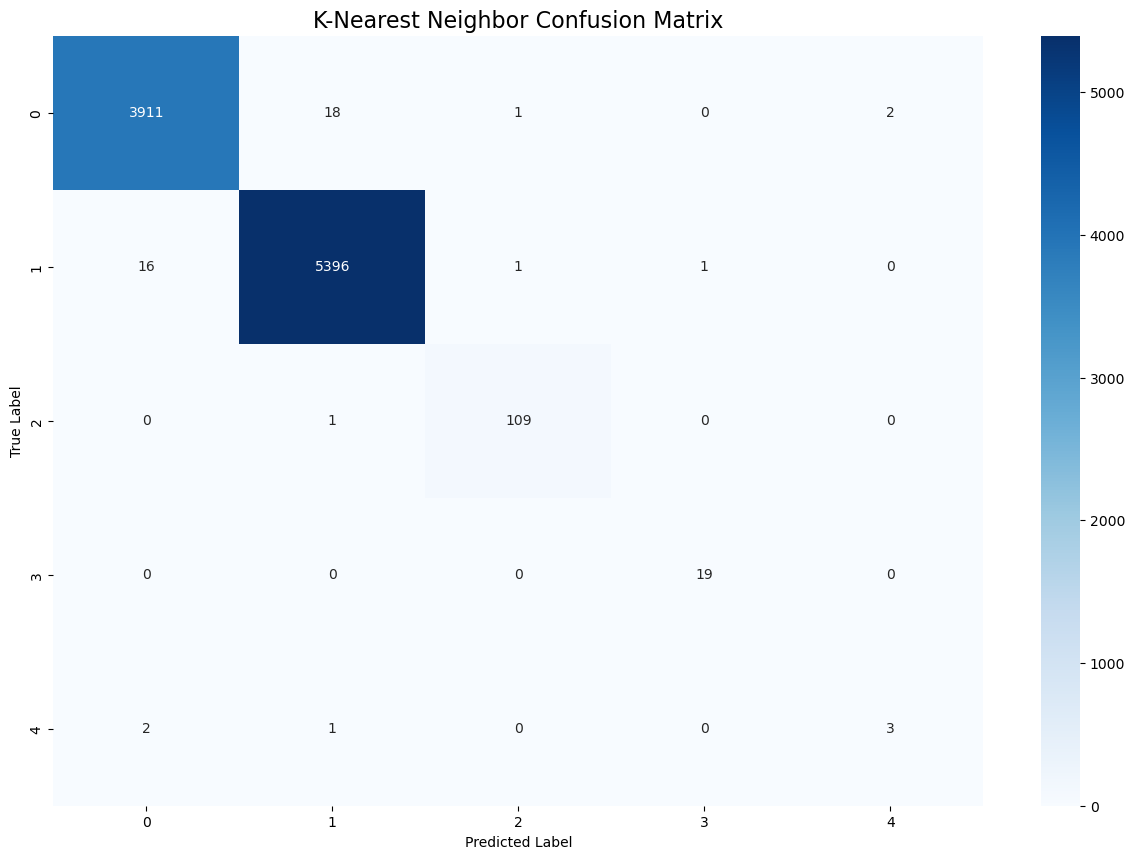

In [61]:
from sklearn.metrics import confusion_matrix
confusion_knn = confusion_matrix(y_true = y_test, y_pred = knn_pred)

# Plotting our confusion matrix
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_knn, annot = True, fmt = 'd', ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('K-Nearest Neighbor Confusion Matrix', fontsize = 16)

### 2. Applying Support Vector Machines - This is based on the CSE 574 Machine Learning Project 3 submission by myself, Johann Matzal

In [104]:
from sklearn import svm

# Creating the SVM
svm_model = svm.SVC(kernel = 'linear', C = 10, random_state = 0)

# Training the SVM model
svm_model.fit(x_train, y_train)

# Predicting test_y
svm_pred = svm_model.predict(x_test)

In [105]:
svm_report = classification_report(y_test, svm_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3932
           1       0.97      1.00      0.98      5414
           2       0.00      0.00      0.00       110
           3       0.00      0.00      0.00        19
           4       0.83      0.83      0.83         6

    accuracy                           0.98      9481
   macro avg       0.56      0.57      0.56      9481
weighted avg       0.97      0.98      0.98      9481



C:\Users\hansm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hansm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hansm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
# Calculating the overall accuracy of the model: total number of correct predictions / total number of observations
accuracy_svm = svm_model.score(x_test, y_test)
print(f'Test Accuracy: {accuracy_svm*100:.5f}%')

Test Accuracy: 98.23858%


In [117]:
svm_loss = hamming_loss(y_test, svm_pred)
print(svm_loss)

0.017614175719860774


Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix')

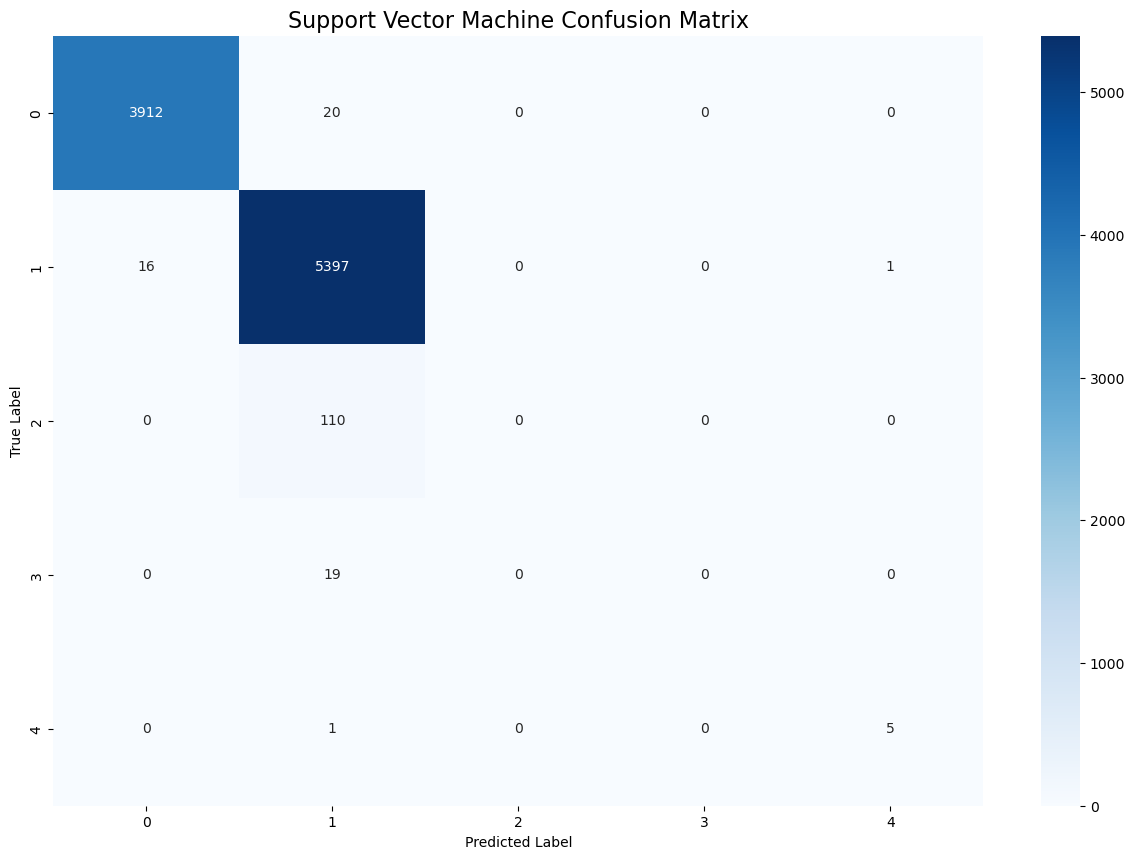

In [107]:
confusion_svm = confusion_matrix(y_true = y_test, y_pred = svm_pred)

# Plotting our confusion matrix
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_svm, annot = True, fmt = 'd', ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Support Vector Machine Confusion Matrix', fontsize = 16)

### 3. Applying Classification Decision Tree

In [98]:
from sklearn import tree

# Creating the Decision Tree model
tree_model = tree.DecisionTreeClassifier()

# Training the Decision Tree model
tree_model = tree_model.fit(x_train.values, y_train.values)

# Generating predictions
tree_pred = tree_model.predict(x_test.values)

In [100]:
tree_report = classification_report(y_test, tree_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3932
           1       1.00      1.00      1.00      5414
           2       1.00      1.00      1.00       110
           3       1.00      1.00      1.00        19
           4       1.00      0.83      0.91         6

    accuracy                           1.00      9481
   macro avg       1.00      0.97      0.98      9481
weighted avg       1.00      1.00      1.00      9481



In [122]:
# from sklearn.metrics import accuracy_score
# accuracy_tree = accuracy_score(y_test, tree_pred)
# print(accuracy_tree)

# Calculating the overall accuracy of the model: total number of correct predictions / total number of observations
accuracy_tree = tree_model.score(x_test.values, y_test.values)
print(f'Test Accuracy: {accuracy_tree*100:.5f}%')

Test Accuracy: 99.97891%


In [118]:
tree_loss = hamming_loss(y_test, tree_pred)
print(tree_loss)

0.00021094821221390148


Text(0.5, 1.0, 'Classification Decision Tree Confusion Matrix')

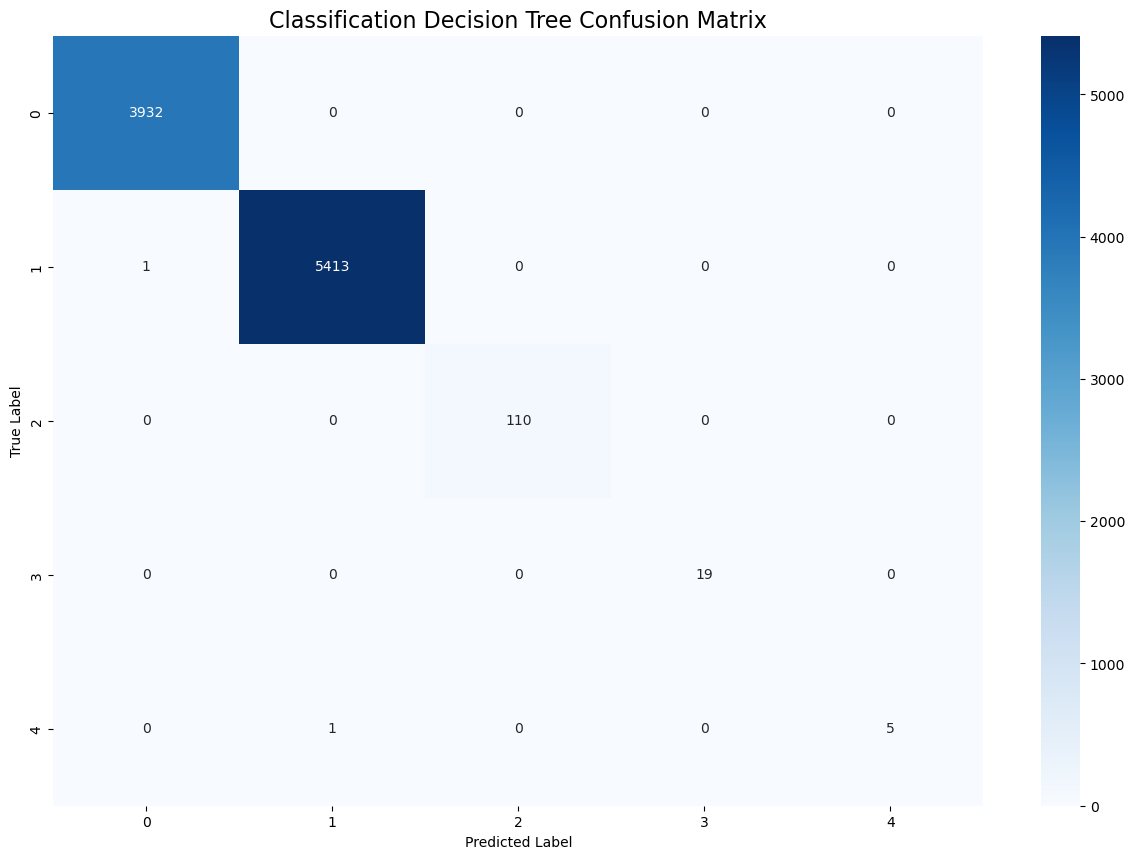

In [123]:
confusion_tree = confusion_matrix(y_true = y_test, y_pred = tree_pred)

# Plotting our confusion matrix
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_tree, annot = True, fmt = 'd', ax=ax, cmap = "Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Classification Decision Tree Confusion Matrix', fontsize = 16)

# Step 3: Building a NN

### 4. Building a Shallow NN

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [71]:
class Model(nn.Module):
    # Input Layer (5 features of NYPD arrest data)
    
    def __init__(self, in_features = 5, out_features = 5, dimen = 1):
        super().__init__() #instantiates our nn.Model
        self.fc1 = nn.Linear(in_features, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.out = nn.Linear(16, out_features)
    
    def forward(self, x, dimen):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = dimen)
        x = self.out(x)
        
        return x

In [72]:
# Create an instance of the model
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=5, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=5, bias=True)
)


In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
x_train_tens = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tens = torch.tensor(y_train.values, dtype=torch.int64)

x_val_tens = torch.tensor(x_val.values, dtype=torch.float32)
y_val_tens = torch.tensor(y_val.values, dtype=torch.int64)

x_test_tens = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tens = torch.tensor(y_test.values, dtype=torch.int64)

In [75]:
# Set the criterion of our model to measure the error

In [76]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [77]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=5, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=5, bias=True)
)>

In [78]:
# Training
# Each epoch is one run through all of the training data
epochs = 200
losses = []

for i in range(epochs):
    # Forward through the model and return a prediction
    y_pred = model.forward(x_train_tens, dimen = 1)
    #y_pred = y_pred.to(torch.long)
    #y_train_tens = y_train_tens.to(torch.long)
    #print(y_pred.dtype)
    #print(y_train_tens.dtype)
    
    # Measuring the error
    loss = criterion(y_pred, y_train_tens)
    
    # Keeping track of the loss
    losses.append(loss.detach().numpy())
    
    # Print every epoch
    if i%25 == 0:
        print(loss)
    
    # Backpropogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    


tensor(1.7367, grad_fn=<NllLossBackward0>)
tensor(1.1694, grad_fn=<NllLossBackward0>)
tensor(0.7920, grad_fn=<NllLossBackward0>)
tensor(0.5637, grad_fn=<NllLossBackward0>)
tensor(0.4748, grad_fn=<NllLossBackward0>)
tensor(0.2981, grad_fn=<NllLossBackward0>)
tensor(0.2320, grad_fn=<NllLossBackward0>)
tensor(0.2057, grad_fn=<NllLossBackward0>)


Text(0.5, 0, 'Epochs')

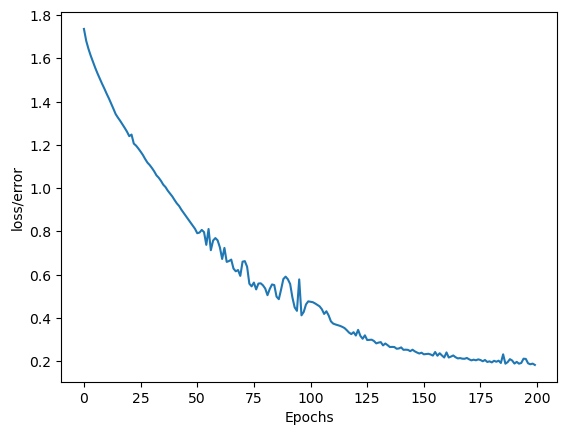

In [79]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")

In [80]:
with torch.no_grad(): # the .nograd() will turn off backpropogation
    y_eval = model.forward(x_test_tens, dimen = 1)
    loss = criterion(y_eval, y_test_tens) # calculates the error
    print(loss)

tensor(0.1785)


In [86]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(x_test_tens):
        y_pred = model.forward(data, dimen = 0)
        
        #print(f'{i+1}: {str(y_pred)} \t {y_test_tens[i]}')
        
        if y_pred.argmax().item() == y_test_tens[i]:
            correct += 1
            
accuracy_nn = (correct/i)*100            
print(f'Accuracy: {accuracy_nn:.5f}%')
        

Accuracy: 97.83755%


### 5. Saving the model

In [82]:
torch.save(model.state_dict(), 'C:/Users/hansm/OneDrive/Documents/DL/Assignment 0/simple_nn.pth')

### 6. Comparison

In [109]:
print(f'KNN Accuracy: {accuracy_knn*100:.5f}%')

KNN Accuracy: 99.54646%


In [108]:
print(f'SVM Accuracy: {accuracy_svm*100:.5f}%')

SVM Accuracy: 98.23858%


In [111]:
print(f'Classification Decision Tree Accuracy: {accuracy_tree*100:.5f}%')

Classification Decision Tree Accuracy: 99.97891%


In [87]:
print(f'NN Accuracy: {accuracy_nn:.5f}%')

NN Accuracy: 97.83755%


#### As we can see, our KNN and Decision Tree models had the highest accuracies. And, all of the models had high accuracies within the 90% range.

#### However, I would expect that with a properly optimized neural network model, we would achieve a similar accuracy to KNN, if not greater. The neural network's accuracy in this case is lower, despite it being a more complex model, because it is rudimentary and not properly optimzed.

#### Additionally, looking at the confusion matrices for KNN and SVM, it appears that the first two classes are where the majority of the errors occur. SVM incorrectly classifies class 2 and 3 into class 1. And, KNN's mistakes come from mixing up class 0 and class 1 classifications.